# Model Optimization- Logistic Regression

Lets first see what parameters could possibly be tuned

In [1]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
params = clf.get_params()
print("There are %d parameters for the Logistic Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 14 parameters for the Logistic Model.  The Default values are:
                        C:   1.0
             class_weight:   None
                     dual:   False
            fit_intercept:   True
        intercept_scaling:   1
                 max_iter:   100
              multi_class:   ovr
                   n_jobs:   1
                  penalty:   l2
             random_state:   None
                   solver:   liblinear
                      tol:   0.0001
                  verbose:   0
               warm_start:   False


In [10]:
# get the data 
import ml_utils as mu

with mu.HiddenPrints():
    X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data()

[2018-07-09 22:06:59.197190] Starting tuning classifier__penalty
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Best parameters set found on development set:

{'classifier__penalty': 'l1'}


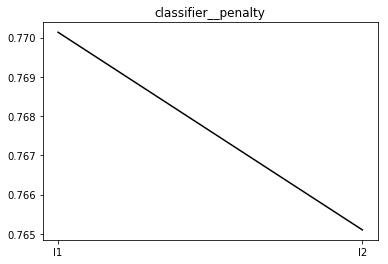

[2018-07-09 22:07:06.048537] Done with tuning classifier__penalty (Took 0.100 minutes)
[2018-07-09 22:07:06.048537] Starting tuning classifier__C
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.1s finished


Best parameters set found on development set:

{'classifier__C': 5298.3169062837078}


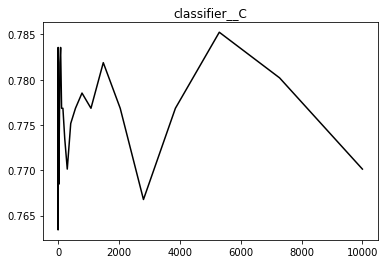

[2018-07-09 22:07:15.616830] Done with tuning classifier__C (Took 0.150 minutes)


In [12]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

# parameters and ranges to plot
param_grid = {
    "classifier__penalty": ['l1', 'l2'],
    "classifier__C": np.logspace(0, 4, 30)
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', LogisticRegression(random_state = 84))
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)